# Milestone 1
# Batch HCK 002
# Ananta Faadillah Sophan


# Problem Statement
Membuat model untuk mengklasifikasikan default payment nasabah pada Bank National Taiwan


(Default Payment adalah kegagalan untuk membayar kembali hutang termasuk bunga atau pokok pinjaman atau sekuritas. Kegagalan pembayaran dapat terjadi ketika peminjam tidak dapat melakukan pembayaran tepat waktu, melewatkan pembayaran, atau menghindari atau berhenti melakukan pembayaran.)

## Query For Dataset
SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
from `bigquery-public-data.ml_datasets.credit_card_default`
LIMIT 4000

- Mengambil data dan kolom yang diperlukan dengan limit 4000 jumlah data nya

## Import Libraries

Import Library yang dibutuhkan

In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV



In [3]:
from xgboost import XGBClassifier

In [4]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

## Data Loading

Import Dataset yang akan digunakan

In [5]:
df = pd.read_csv('/content/h8dsft_P1M1_ananta_sophan.csv.csv')

In [6]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,50000.0,1,2,1,42.0,0.0,0.0,0.0,0.0,0,...,31320.0,36227.0,35569.0,2007.0,2000.0,1500.0,5400.0,0.0,3000.0,0
3,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
4,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0


In [7]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2961,110000.0,2,2,2,24.0,-1.0,-1.0,-1.0,-1.0,0,...,36986.0,40053.0,41196.0,1352.0,1867.0,36986.0,5000.0,3000.0,23000.0,0
2962,160000.0,2,1,2,32.0,-1.0,-1.0,-1.0,-1.0,-1,...,3181.0,4998.0,1250.0,5726.0,5037.0,3182.0,5000.0,1252.0,749.0,0
2963,210000.0,2,1,1,38.0,0.0,0.0,-1.0,-1.0,0,...,23067.0,19972.0,45864.0,3000.0,4521.0,24000.0,10000.0,30000.0,6432.0,0
2964,360000.0,2,2,1,37.0,-1.0,-1.0,0.0,-1.0,-1,...,10000.0,10000.0,10000.0,17444.0,10035.0,10000.0,10000.0,10000.0,0.0,0


In [8]:
df.shape

(2965, 24)

In [9]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [10]:
df[df.duplicated()].shape

(1, 24)

Setelah dilakukan sedikit overview terhadap dataset yang ada, dapat dilihat bahwa dataset tidak memiliki missing values dan hanya memiliki satu duplikasi data. Pembersihan duplikasi data dan pembersihan lebih lanjut akan dilakukan pada Data Cleaning Section

-------------------------------------------------------------------------------

## Data Cleaning


Membuat Copy data baru agar tidak mengganggu dataframe yang asli

In [11]:
df_clean = df.copy()

Melihat unique value yang ada di kolom dataset

In [12]:
for x in df:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In limit_balance:  [130000. 230000.  50000. 200000. 500000. 100000. 140000. 460000.  20000.
  80000. 780000. 220000. 210000. 420000. 150000. 170000. 180000.  70000.
 320000. 110000. 410000. 190000. 260000. 300000. 290000. 380000. 240000.
 280000. 340000. 160000. 360000. 390000. 350000.  90000. 310000. 480000.
  30000.  60000. 400000. 800000.  10000. 120000. 470000. 250000. 370000.
 490000. 430000. 330000.  40000. 530000. 510000. 270000. 440000. 700000.
 750000. 560000. 450000. 680000. 620000.] 
 Total Value: 59
----------------------------------------------------------------------------------------------------
Value In sex:  [1 2] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In education_level:  [1 2 5 3 6 4 0] 
 Total Value: 7
----------------------------------------------------------------------------------------------------
Value In marital_status:  [1 2 3 0] 
 Total Value: 4
-----------------------

Berikut adalah penjelasan maksud dari kolom yang ada di dataset berdasarkan Google Big Cloud: 
- limit_balance= Amount of given credit in NT dollars (includes individual and family/supplementary credit	
- sex= Gender (1=male, 2=female)	
- education_level= Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)	
- marital_status= Marital status (1=married, 2=single, 3=others)	
- Age= age in years	
- pay_0= Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, etc)	
- pay_2= Repayment status in August, 2005 	
- pay_3= Repayment status in July, 2005 	
- pay_4= Repayment status in June, 2005 
- pay_5= Repayment status in May, 2005 	
- pay_6= Repayment status in April, 2005 	
- bill_amt_1= Amount of bill statement in September, 2005 	
- bill_amt_2= Amount of bill statement in August, 2005 	
- bill_amt_3= Amount of bill statement in July, 2005 	
- bill_amt_4= Amount of bill statement in June, 2005 	
- bill_amt_5= Amount of bill statement in May, 2005 	
- bill_amt_6= Amount of bill statement in April, 2005 	
- pay_amt_1= Amount of previous payment in September, 2005 	
- pay_amt_2= Amount of previous payment in August, 2005 	
- pay_amt_3= Amount of previous payment in July, 2005 	
- pay_amt_4= Amount of previous payment in June, 2005 	
- pay_amt_5= Amount of previous payment in May, 2005 	
- pay_amt_6= Amount of previous payment in April, 2005 	
- default_payment_next_month= Default payment (1=yes, 0=no)

Menghapus duplikasi data

In [13]:
df_clean.drop_duplicates(inplace=True)

# shape of dataframe after remove duplicates
df_clean[df_clean.duplicated()].shape

(0, 24)

Setelah dilakukan penghapusan duplikasi data, saya melihat ada perbedaan antara deskripsi pada kolom marital_status ((1=married, 2=single, 3=others) namun ada value '0' pada marital_status yang tidak mempunyai arti. Selain itu, pada kolom education_level juga terdapat keanehan dimana deskripsi 5=unknown memiliki makna yang sama dengan 6=unknown dan kedua value tersebut tidak menurut saya bersifat ambigu. Berdasarkan analisa yang sudah dituliskan, saya akan melakukan grouping terhadap value tersebut

### FE: education_level

Melakukan Grouping pada kolom education_level

In [14]:
df_clean['education_level']=np.where(df_clean['education_level'] == 5, 4, df_clean['education_level'])
df_clean['education_level']=np.where(df_clean['education_level'] == 6, 4, df_clean['education_level'])
df_clean['education_level']=np.where(df_clean['education_level'] == 0, 4, df_clean['education_level'])

In [15]:
df['education_level'].value_counts().sort_values()

0       2
6       4
4      13
5      24
3     483
1    1039
2    1400
Name: education_level, dtype: int64

In [16]:
df_clean['education_level'].value_counts().sort_values()

4      43
3     483
1    1038
2    1400
Name: education_level, dtype: int64

Value '5' dan '6' digabungkan ke value '4' yang memiliki arti sebagai 'Others' 

### FE: marital_status

In [17]:
df_clean['marital_status']=np.where(df_clean['marital_status'] == 0, 3, df_clean['marital_status'])

In [18]:
df['marital_status'].value_counts().sort_values()

0       4
3      35
1    1332
2    1594
Name: marital_status, dtype: int64

In [19]:
df_clean['marital_status'].value_counts().sort_values()

3      39
1    1331
2    1594
Name: marital_status, dtype: int64

Value '0' digabungkan ke value '3' yang memiliki arti sebagai 'Others' 

--------------------------------------------------------------------------------

Melihat total jumlah baris dan kolom pada data yang sudah dibersihkan

In [20]:
df_clean.shape

(2964, 24)

## Exploratory Data Analysis

0    2330
1     635
Name: default_payment_next_month, dtype: int64
--------------------------------------------------------------------------------


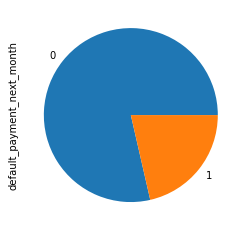

In [21]:
print(df['default_payment_next_month'].value_counts())
print('-'*80)
df['default_payment_next_month'].value_counts().plot(kind='pie')


Dapat dilihat bahwa pada kolom 'default_payment_next_month' yang merupakan target, jumlah data antara '0' dan '1' tidak seimbang atau bisa disebut data imbalance. Data imbalance dapat mempengaruhi performa model yang akan dibuat nantinya.

definisi dari kelas target:
- 0 = nasabah yang melakukan pembayaran tepat waktu
- 1 = nasabah yang melakukan pembayaran telat atau belum lunas

### Categorical Columns that already being encoded

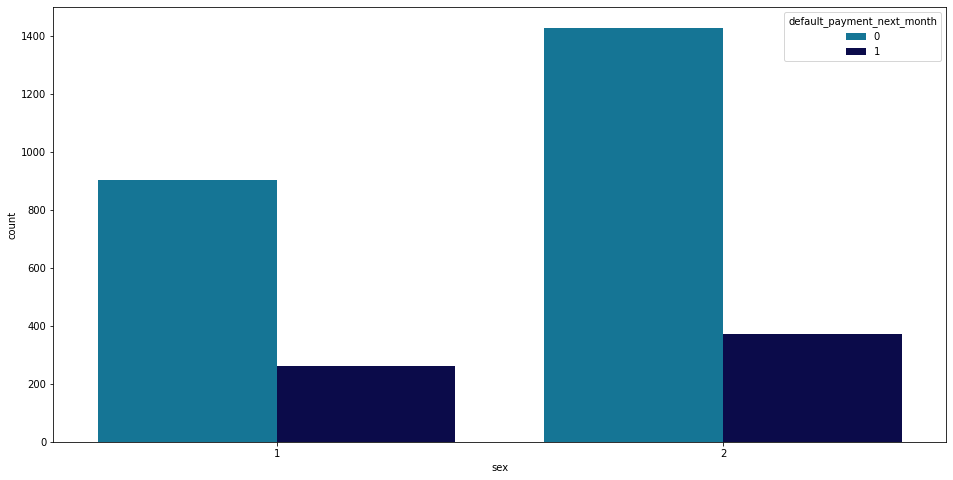

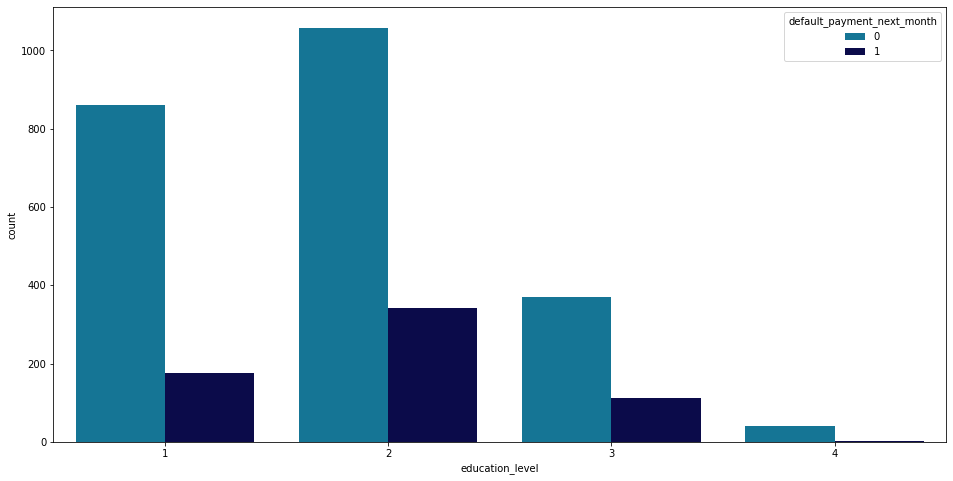

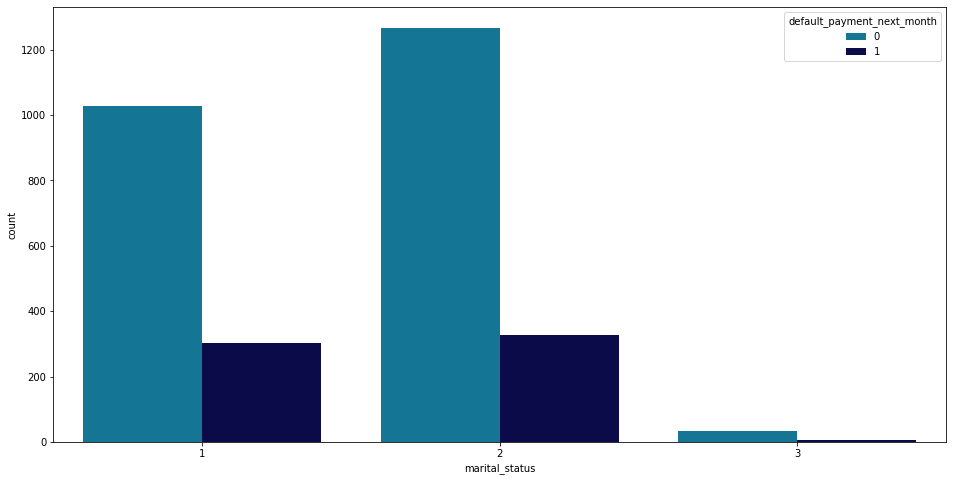

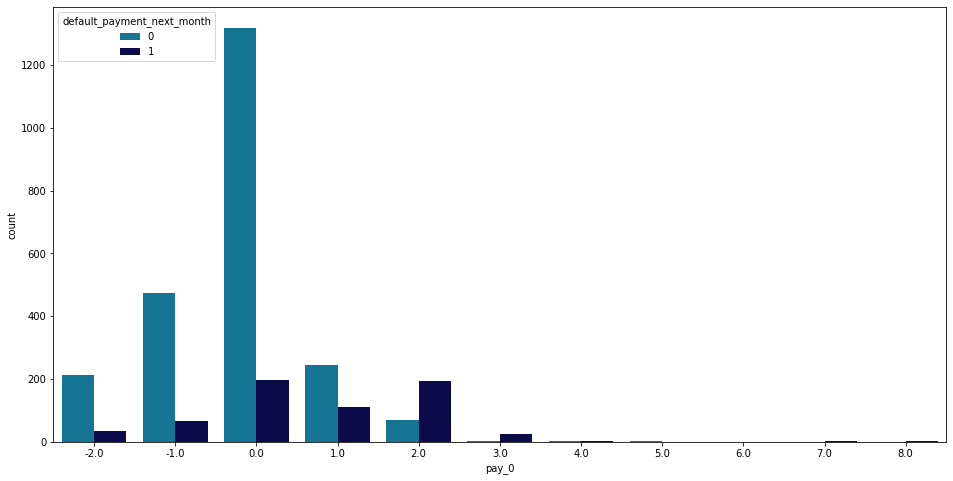

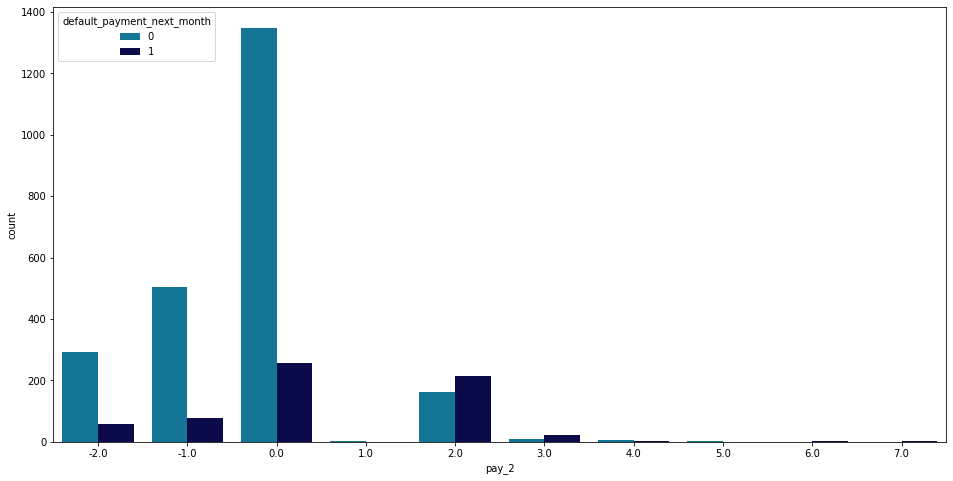

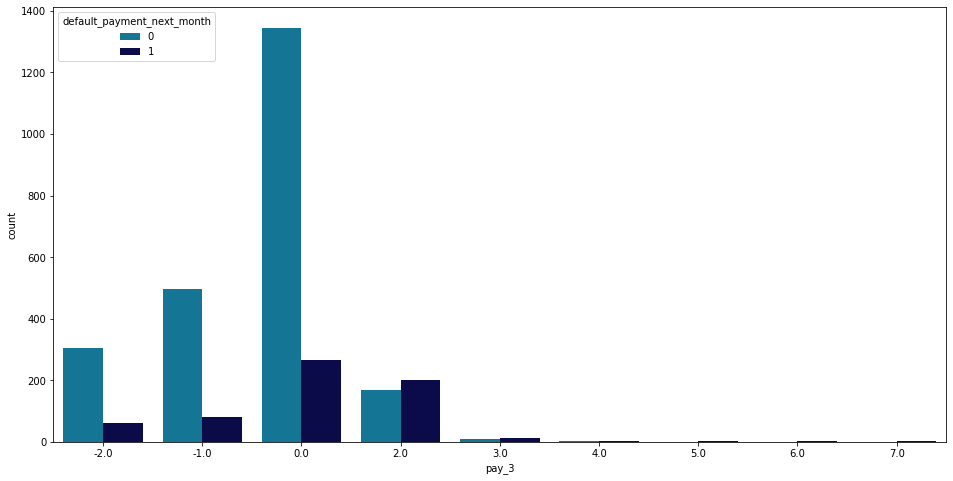

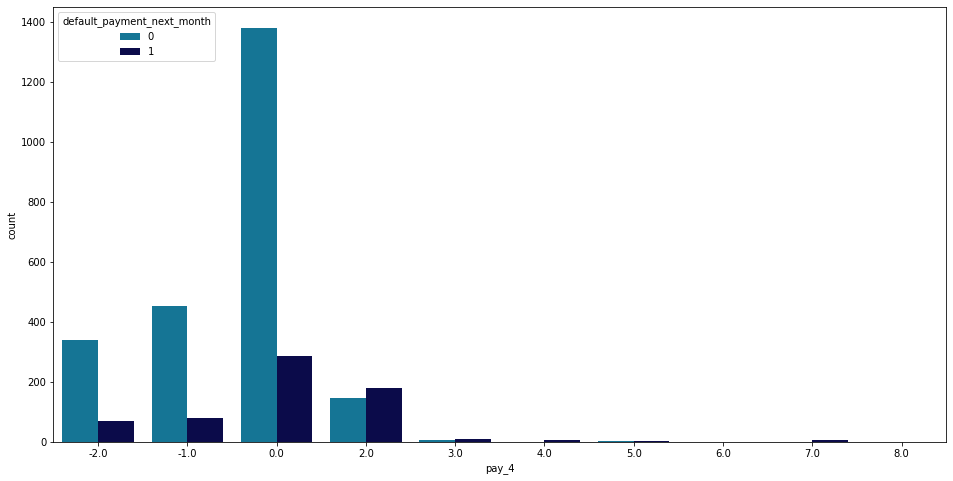

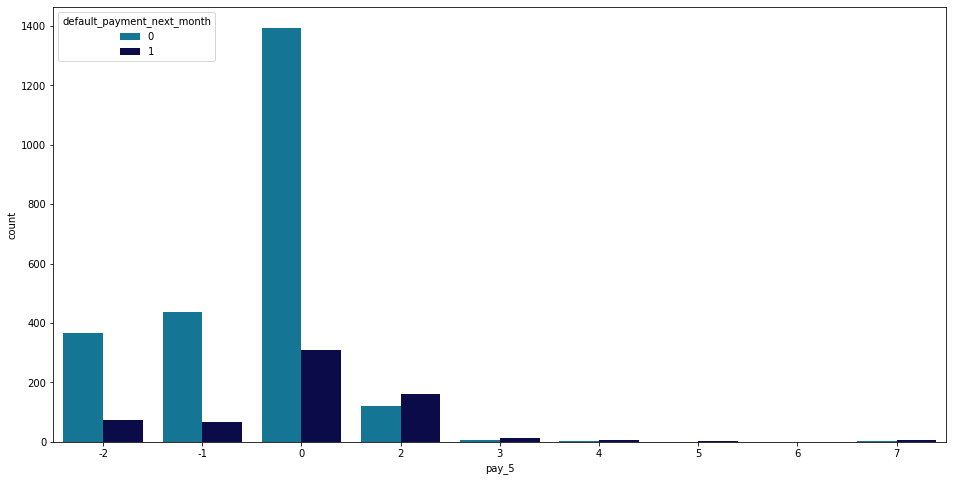

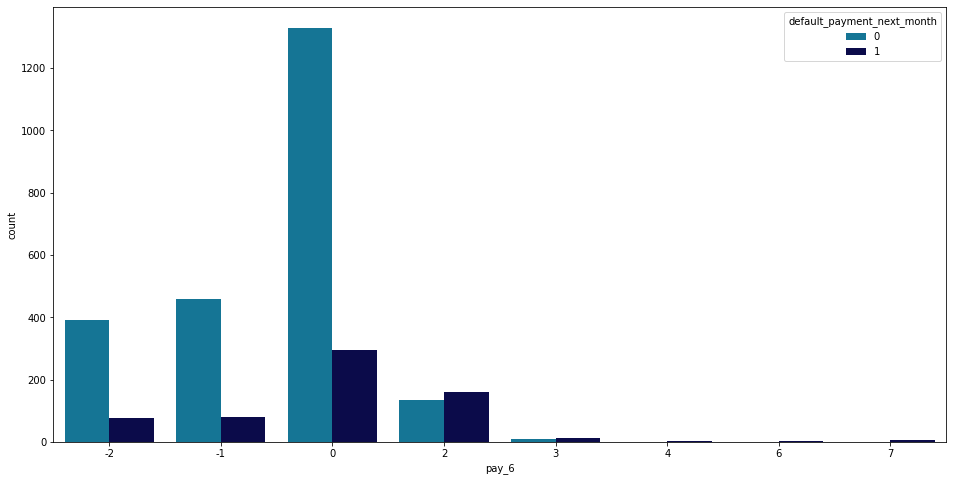

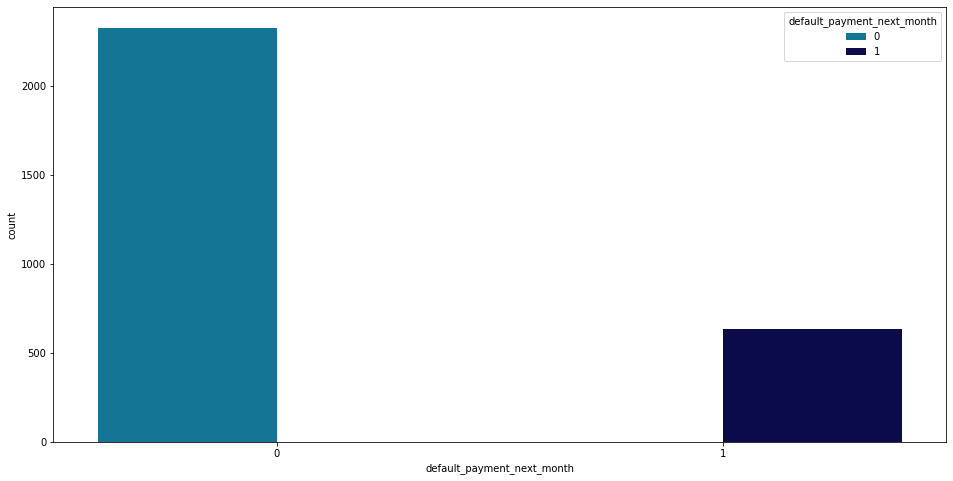

In [22]:
catencoded = df_clean[['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 
               'pay_5', 'pay_6', 'default_payment_next_month']]
for col in catencoded:
    plt.figure(figsize=(16,8))
    sns.countplot(x=col,data=catencoded, palette="ocean_r", hue='default_payment_next_month')
    plt.show()

Jika dilihat dari plot, berikut adalah beberapa insight yang saya hasil EDA:
1. dilihat dari jenis kelamin para nasabah, perempuan lebih banyak melakukan pinjaman daripada laki-laki, dan baik laki-laki maupun perempuan lebih banyak yang melakukan pembayaran tepat waktu daripada yang tidak
2. dilihat dari tingkat edukasi para nasabah, nasabah yang paling banyak melakukan pinjaman adalah nasabah yang tingkat edukasinya adalah 'University'
3. dilihat dari tingkat Status para nasabah, nasabah yang paling banyak melakukan pinjaman adalah nasabah yang belum menikah 
4. Dilihat dari Repayment status selama April sampai September (pay_0,pay_2,pay_3,pay_4,pay_5,pay_6), value yang paling banyak dari keenam kolom tersebut adalah '0' yang artinya nasabah lebih banyak melakukan pembayaran tepat waktu daripada tidak

#### Feature Selection (Categorical Columns)

##### Heatmap Correlation

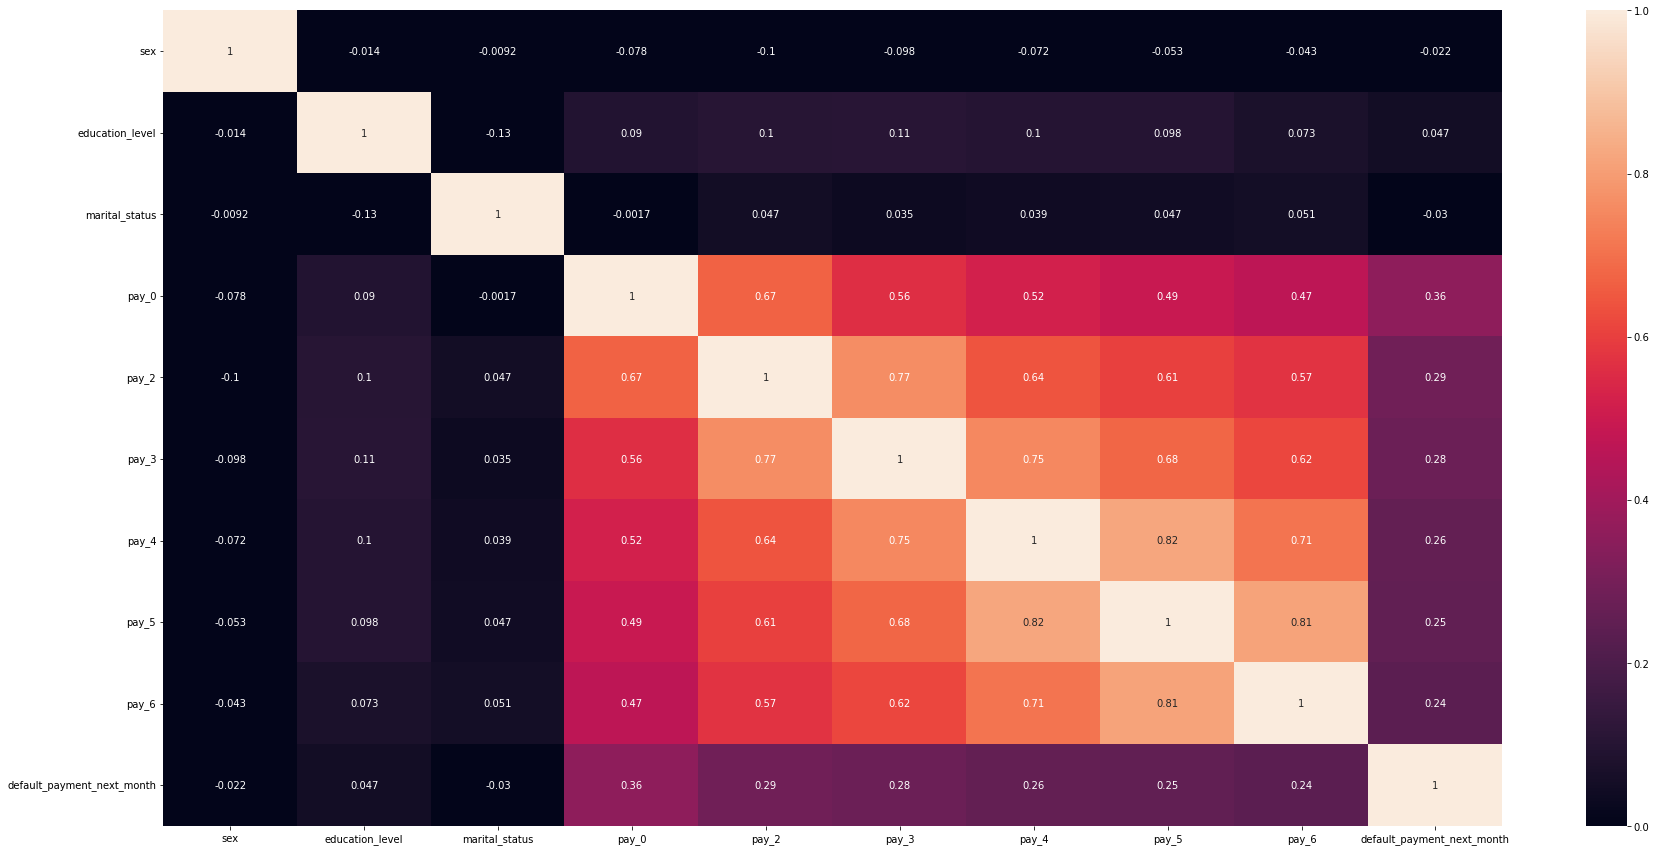

In [23]:
corr = catencoded.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

dilihat dari Heatmap Correlation, jika threshold yang saya pakai adalah 0.2, maka korelasi feature dengan target yang akan dipilih adalah pay_0, pay_2, pay_3, pay_4, pay_5, pay_6 karena memiliki nilai diatas 0.2 yang artinya kolom tersebut cukup berpengaruh terhadap 'default_payment_next_month' yang merupakan target


--------------------------------------------------------------------------------

membuat dataframe baru berisi feature yang dipilih

In [24]:
df_cat = df_clean[['pay_0', 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6','default_payment_next_month']]

In [25]:
df_cat.tail()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
2960,-1.0,-1.0,-1.0,-1.0,-2,-1,0
2961,-1.0,-1.0,-1.0,-1.0,0,0,0
2962,-1.0,-1.0,-1.0,-1.0,-1,-1,0
2963,0.0,0.0,-1.0,-1.0,0,0,0
2964,-1.0,-1.0,0.0,-1.0,-1,-1,0


##### VIF Test

VIF test dilakukan untuk mengetahui apakah kolom tersebut saling bergantung satu sama lain. Pada kasus ini, kolom 'pay' merupakan repayment status sehingga saya akan melihat apakah kolom-kolom 'pay' pada dataset kali ini saling bergantung atau tidak

In [26]:
#Grouping numerical features
vif_nums = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
#finding correlation between features
def calc_vif(vif_cap):

    X = df_cat[vif_cap]
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# compute vif 
calc_vif(vif_nums).sort_values('VIF', ascending=False)

,Variable,VIF
4,pay_5,4.805173
3,pay_4,4.080385
2,pay_3,3.399130
5,pay_6,3.176901
1,pay_2,3.114527
0,pay_0,1.838570


Jika Threshold yang dipakai adalah 5, maka antara kolom pay yang ada saling tidak bergantung. Karena kolom-kolom tersebut tidak bergantung, maka saya akan mengambil semuanya untuk dijadikan feature dalam modeling

### Numerical Columns

In [27]:
df_clean.columns.tolist()

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month']

Mengambil kolom Numerikal dari dataset

In [28]:
df_num = df_clean[['limit_balance',
 'age',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month'
]]

Disini saya ingin melihat secara spesifik apakah ada hubungan 'limit_balance' dan 'age' dengan 'default_payment_next_month'

In [29]:
numeda = df_num[['limit_balance',
 'age',
 'default_payment_next_month']]

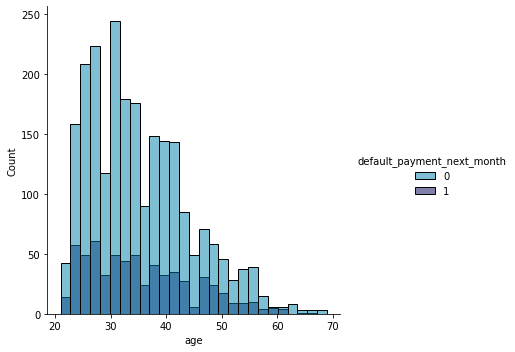

In [30]:
sns.displot(x='age',data=numeda, palette="ocean_r", hue='default_payment_next_month')
plt.show()



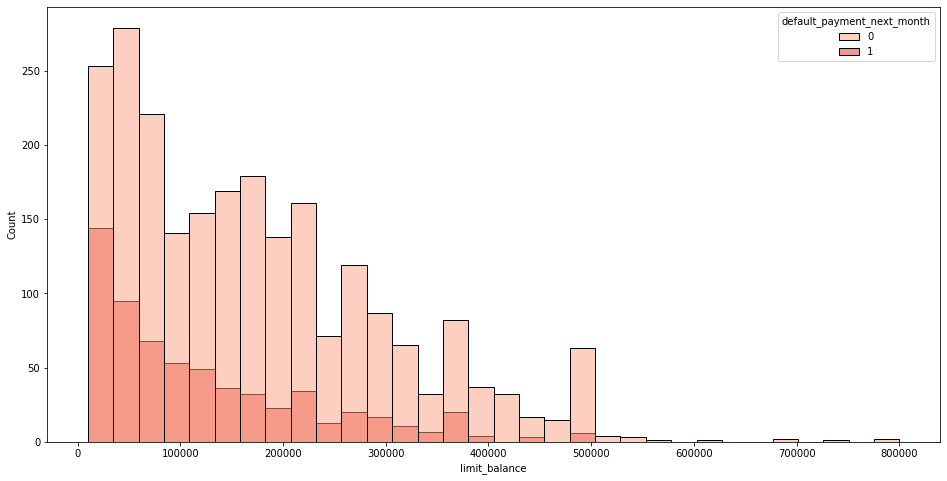

In [31]:
plt.figure(figsize=(16,8))
sns.histplot(x='limit_balance',data=numeda, palette="Reds",hue = 'default_payment_next_month')
plt.show()

Jika dilihat dari plot, berikut adalah beberapa insight yang saya hasil EDA:
1. Rentang umur nasabah pada Bank Nasional Taiwan adalah 20 sampai 70 tahun
2. Limit Balance nasabah pada Bank Nasional Taiwan adalah 10000 NT sampai 800000 NT dan yang paling banyak tidak melakukan pembayaran tepat waktu atau belum lunas adalah limit balance yang dibawah 100000 NT

--------------------------------------------------------------------------------

Melihat Statistik Deskriptif kolom numerikal

In [32]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
bill_amt_1,2964.0,52135.889001,72334.536115,-11545.0,3979.75,24325.0,69863.00,613860.0
bill_amt_2,2964.0,50666.241228,70790.828470,-67526.0,3403.50,23169.0,67836.25,512650.0
bill_amt_3,2964.0,48256.032726,68151.445516,-25443.0,3311.75,21549.5,63034.50,578971.0
bill_amt_4,2964.0,44104.558367,61912.600106,-46627.0,2585.00,19895.0,58638.50,488808.0
bill_amt_5,2964.0,40969.898448,58276.878626,-46627.0,1974.50,18819.5,53414.50,441981.0
bill_amt_6,2964.0,39786.491228,57308.498646,-73895.0,1433.00,18511.5,52297.00,436172.0
pay_amt_1,2964.0,6351.044872,20888.933729,0.0,1013.00,2238.0,5089.50,493358.0
pay_amt_2,2964.0,6274.610661,28884.317574,0.0,997.50,2182.5,5000.00,1227082.0


#### Feature Selection (Numerical Columns)

##### Heatmap Correlation

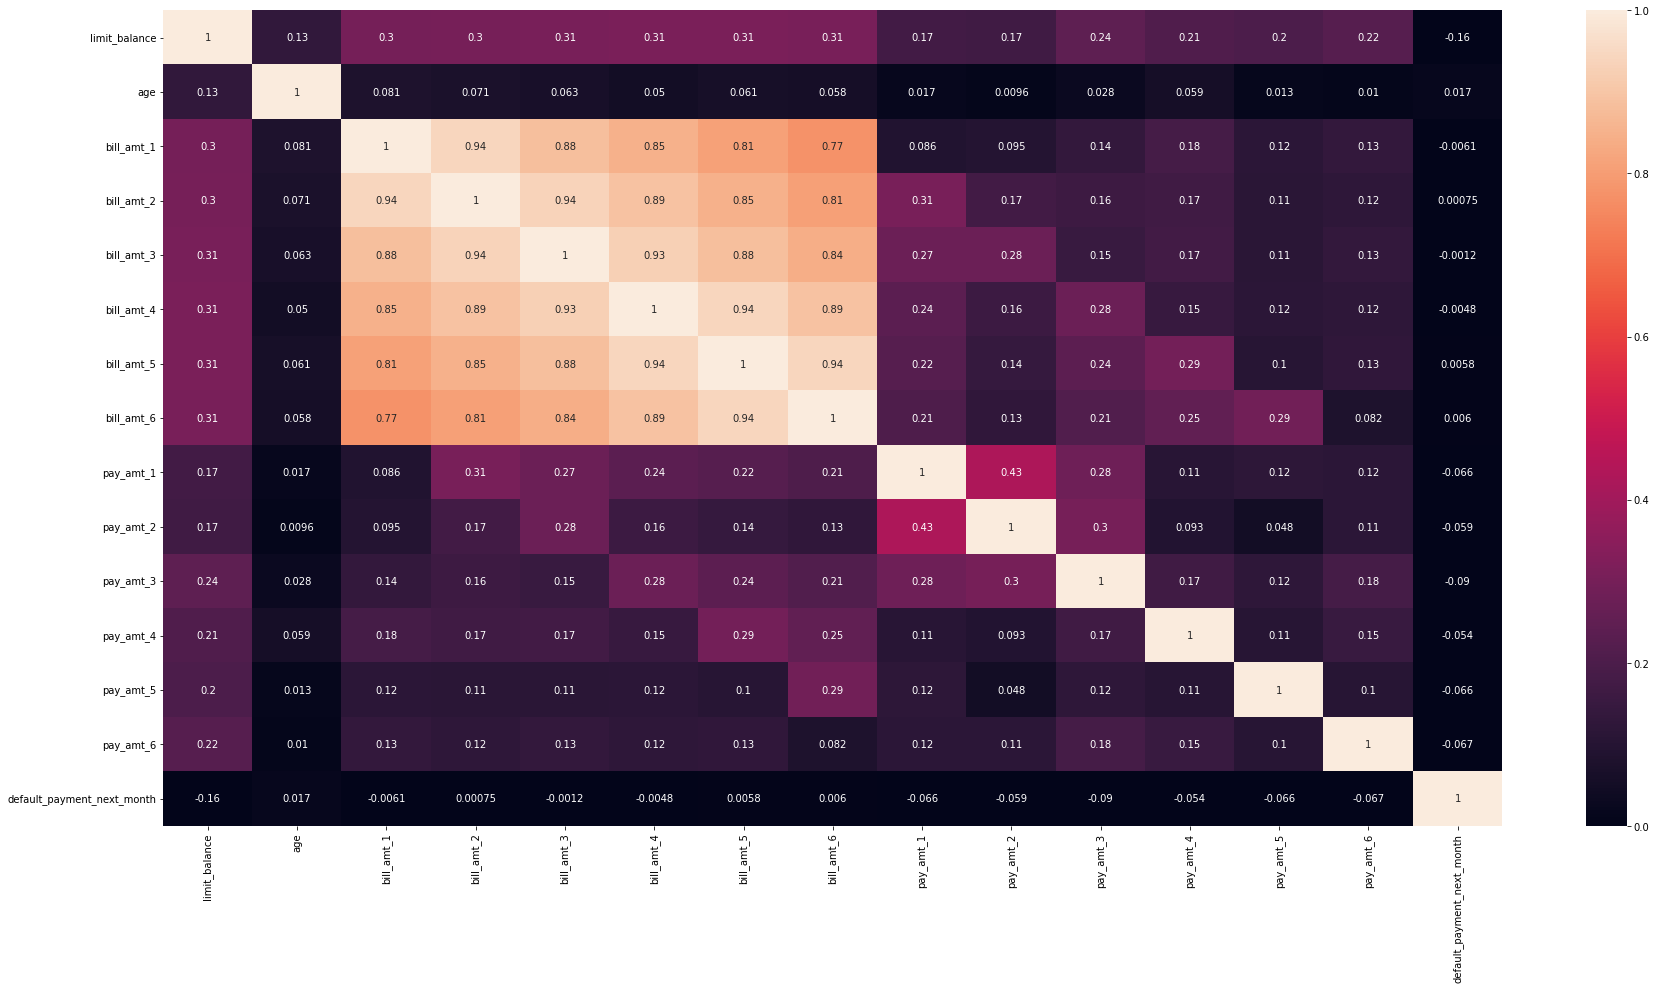

In [33]:
corr2 = df_num.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(corr2, annot= True, vmin=0, vmax=1)
plt.show()

Dilihat dari Heatmap Correlation, hubungan antara target default_payment_next_month' dan kolom lainnya semuanya memiliki nilai korelasi yang kecil, maka dari itu saya hanya akan mengambil nilai yang paling mempengaruhi si targetnya

--------------------------------------------------------------------------------

##### Feature Selection with Mutual Information

Untuk pemilihan feature selection lebih lanjut, saya akan menggunakan metode mutual info untuk mengetahui kolom mana yang paling mempengaruhi target

In [34]:
from sklearn.feature_selection import mutual_info_classif

In [35]:
Xfs = df_num.drop('default_payment_next_month',axis=1)
yfs = df_num['default_payment_next_month']

In [36]:
mutual_info = mutual_info_classif(Xfs, yfs)
mutual_info

array([0.02120874, 0.        , 0.00763327, 0.00986319, 0.00172475,
       0.00731034, 0.00202779, 0.        , 0.02903579, 0.01793765,
       0.01024077, 0.01372752, 0.01295807, 0.00788257])

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = Xfs.columns
mutual_info.sort_values(ascending=False)

pay_amt_1        0.029036
limit_balance    0.021209
pay_amt_2        0.017938
pay_amt_4        0.013728
pay_amt_5        0.012958
pay_amt_3        0.010241
bill_amt_2       0.009863
pay_amt_6        0.007883
bill_amt_1       0.007633
bill_amt_4       0.007310
bill_amt_5       0.002028
bill_amt_3       0.001725
age              0.000000
bill_amt_6       0.000000
dtype: float64

Setelah dilihat, nilai mutual info yang didapatkan juga kecil, maka dari itu saya hanya akan mengambil nilai terbesar dari mutual info yaitu kolom 'pay_amt_1' yang paling mempengaruhi si targetnya

--------------------------------------------------------------------------------

membuat dataframe baru berisi feature yang dipilih

In [38]:
df_num = df_num[['limit_balance','pay_amt_1']]

In [39]:
df_num.head()

,limit_balance,pay_amt_1
0,130000.0,2886.0
1,230000.0,9405.0
2,50000.0,2007.0
3,200000.0,7822.0
4,500000.0,54209.0


#### Handling Outlier

plotting persebaran data dan melihat upper boundaries, lower boundaries, dan nilai skew pada kolom numerikal

In [40]:
def plot_dist(df_num, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df_num[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_num[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_num[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

# boxplot
    if df_num[col].skew() >= 1 or df_num[col].skew() <= -1 :
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=3)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
    else:
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=1.5)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
        
# skewness
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

##### limit_balance

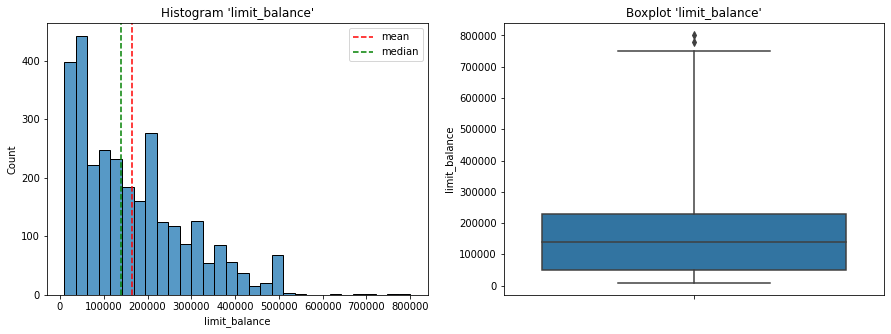

limit_balance Skewness: 1.0006047564306488
Columns 'limit_balance' right skewed


In [41]:
# checking the distribution of limit_balance
plot_dist(df_num, 'limit_balance')

In [42]:
# outlier detection using IQR 
Q3 = df_num['limit_balance'].quantile(.75)
Q1 = df_num['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df_num[(df_num['limit_balance'] > upper) | (df_num['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent limit_balance of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')

count of outlier:  14
percent limit_balance of outlier:  0.47233468286099867 %


Pada kolom 'limit_balance', dapat dilihat dari plot bahwa persebaran datanya cukup bagus dan tidak memiliki terlalu banyak outlier. Nilai skew dari kolom tersebut juga memiliki nilai yang sangat hampir mendekati satu sehingga saya menggunakan nilai 1.5 untuk mengetahui berapa banyak outliernya. Setelah dilihat, menurut saya data pada 'limit_balance' tidak perlu di handling outlier karena sudah memiliki persebaran data yang cukup bagus dan jumlah outlier yang sedikit

##### pay_amt_1

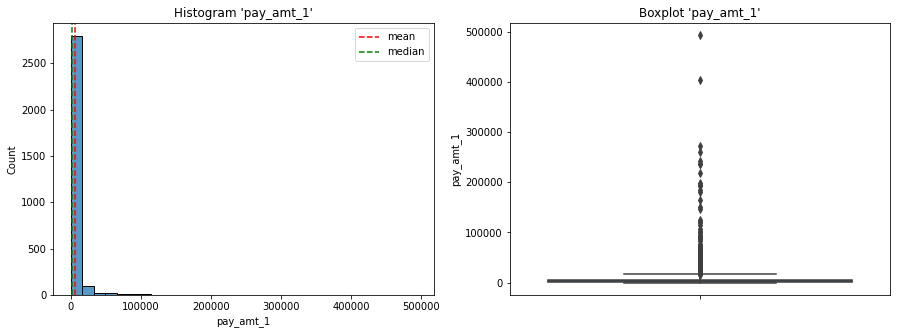

pay_amt_1 Skewness: 11.87590259977231
Columns 'pay_amt_1' right skewed


In [43]:
# checking the distribution of limit_balance
plot_dist(df_num, 'pay_amt_1')

In [44]:
# outlier detection using IQR 
Q3 = df_num['pay_amt_1'].quantile(.75)
Q1 = df_num['pay_amt_1'].quantile(.15)

IQR = Q3 - Q1

upper = Q3 + (3 * IQR)
lower = Q1 - (3 * IQR)

outlier = df_num[(df_num['pay_amt_1'] > upper) | (df_num['pay_amt_1'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percent pay_amt_1 of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')

count of outlier:  127
percent pay_amt_1 of outlier:  4.284750337381917 %


Pada kolom 'pay_amt_1', dapat dilihat dari plot bahwa persebaran datanya tidak normal dan memiliki nilai skew yang tinggi. Karena nilai skew yang tinggi, maka saya menggunakan nilai 3 untuk mengetahui berapa banyak outlier yang ada. Setelah dilihat persentase dan jumlah outliernya, menurut saya kolom ini akan dilakukan handling outlier dengan metode capping

In [45]:
# capping outlier
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['pay_amt_1'])

df_num_cleaned = wins.fit_transform(df_num)

In [46]:
out = ['pay_amt_1']
# Compare before and after outlier handling
print('before handling: \n', df_num[out].describe()) 
print('after handling: \n', df_num_cleaned[out].describe())

before handling: 
            pay_amt_1
count    2964.000000
mean     6351.044872
std     20888.933729
min         0.000000
25%      1013.000000
50%      2238.000000
75%      5089.500000
max    493358.000000
after handling: 
           pay_amt_1
count   2964.000000
mean    3607.965250
std     3543.546039
min        0.000000
25%     1013.000000
50%     2238.000000
75%     5089.500000
max    11204.250000


### Feature Selection 

Menggabungkan kembali kolom kategorikal dan numerikal yang sudah dipilih untuk menjadi feature 

In [47]:
df_final = pd.concat([df_num_cleaned.reset_index(drop=True), df_cat.reset_index(drop=True)], axis=1)
df_final.head()

,limit_balance,pay_amt_1,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,130000.0,2886.00,0.0,0.0,0.0,0.0,0,0,0
1,230000.0,9405.00,0.0,0.0,0.0,0.0,0,0,1
2,50000.0,2007.00,0.0,0.0,0.0,0.0,0,2,0
3,200000.0,7822.00,0.0,0.0,0.0,0.0,0,0,0
4,500000.0,11204.25,0.0,0.0,0.0,0.0,0,0,0


Memisahkan x dan y

In [48]:
X = df_final.drop('default_payment_next_month',axis=1)
y = df_final['default_payment_next_month']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

### Scaling

Melakukan scaling dengan MinMaxScaler karena distribusi datanya tidak normal pada kolom 'pay_amt_1'. Scaling dilakukan dengan tujuan agar model tidak bingung jika membaca nilai dari sebuah value karena sudah dibuat menjadi rentang skala yang lebih kecil

In [50]:
num_col = ['limit_balance', 'pay_amt_1']
scaler = MinMaxScaler()

num_scaled = pd.DataFrame(scaler.fit_transform(df_final[num_col]))
num_scaled.columns = num_col

df_final.drop(num_col, axis=1, inplace=True)
df_final = pd.concat([df_final, num_scaled], axis=1)

In [51]:
df_final.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,limit_balance,pay_amt_1
0,0.0,0.0,0.0,0.0,0,0,0,0.151899,0.257581
1,0.0,0.0,0.0,0.0,0,0,1,0.278481,0.839414
2,0.0,0.0,0.0,0.0,0,2,0,0.050633,0.179128
3,0.0,0.0,0.0,0.0,0,0,0,0.240506,0.698128
4,0.0,0.0,0.0,0.0,0,0,0,0.620253,1.000000


## Data PreProcessing

Melakukan Handling Outlier dan juga Scaling seperti yang sudah dilakukan sebelumnya, namun kali ini dilakukan pada data testing yang nantinya akan menjadi Test Set yang akan dipakai oleh model yang dibuat

In [52]:
testing  = pd.concat([X_test, y_test],axis = 1)

In [53]:
testing.head()

,limit_balance,pay_amt_1,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
91,180000.0,7187.00,0.0,0.0,0.0,0.0,0,0,0
325,20000.0,1318.00,0.0,0.0,0.0,0.0,0,0,0
47,240000.0,8000.00,0.0,0.0,0.0,0.0,0,0,0
2847,240000.0,11204.25,-1.0,-1.0,0.0,-1.0,-1,-1,1
446,150000.0,2000.00,0.0,0.0,0.0,0.0,0,0,0


In [54]:
num_col

['limit_balance', 'pay_amt_1']

In [55]:
testing[num_col] = wins.transform(testing[num_col])


In [56]:
testing[num_col] = scaler.transform(testing[num_col])
testing

,limit_balance,pay_amt_1,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
91,0.215190,0.641453,0.0,0.0,0.0,0.0,0,0,0
325,0.012658,0.117634,0.0,0.0,0.0,0.0,0,0,0
47,0.291139,0.714015,0.0,0.0,0.0,0.0,0,0,0
2847,0.291139,1.000000,-1.0,-1.0,0.0,-1.0,-1,-1,1
446,0.177215,0.178504,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
1245,0.050633,0.143249,0.0,0.0,0.0,0.0,2,0,0
2498,0.367089,0.131379,0.0,0.0,0.0,-1.0,-1,2,0
2725,0.189873,0.939643,-1.0,-1.0,-1.0,-1.0,-1,-1,0
1853,0.101266,0.365933,2.0,0.0,0.0,2.0,0,0,1


Memisahkan Train dan Test Set

In [57]:
X_train = df_final.drop('default_payment_next_month',axis=1).copy()
y_train = df_final['default_payment_next_month']

X_test = testing.drop('default_payment_next_month',axis=1).copy()
y_test = testing['default_payment_next_month']

In [58]:
X_train = X_train[['limit_balance',
 'pay_amt_1',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6'
]]

## Cross Validation

Cross-validation (CV) adigunakan untuk mengevaluasi kinerja model. Tujuan penggunaan cross validation adalah untuk mengatahui model mana yang paling baik untuk dipakai. Disini saya akan mencoba 7 modeling dan melihat model mana yang paling baik ditinjau dari nilai rata-rata dan standar deviasi nya

### Cross Validation for Each Model

#### Logistic Regression

In [59]:
logreg_model = LogisticRegression()
logreg_crossval = cross_val_score(logreg_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accuracy Score - All - Cross Validation  : ', logreg_crossval)
print('Accuracy Score - Mean - Cross Validation : ', logreg_crossval.mean())
print('Accuracy Score - Std - Cross Validation  : ', logreg_crossval.std())

Accuracy Score - All - Cross Validation  :  [0.79089376 0.8010118  0.85666105 0.80775717 0.81418919]
Accuracy Score - Mean - Cross Validation :  0.8141025933184449
Accuracy Score - Std - Cross Validation  :  0.022634100217524485


#### SVM

In [60]:
SVC_model = SVC()
SVC_crossval = cross_val_score(SVC_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accuracy Score - All - Cross Validation  : ', SVC_crossval)
print('Accuracy Score - Mean - Cross Validation : ', SVC_crossval.mean())
print('Accuracy Score - Std - Cross Validation  : ', SVC_crossval.std())

Accuracy Score - All - Cross Validation  :  [0.80775717 0.83473862 0.85834739 0.30522766 0.7972973 ]
Accuracy Score - Mean - Cross Validation :  0.7206736247208422
Accuracy Score - Std - Cross Validation  :  0.2088132996554719


#### Decision Tree

In [61]:
dtree_model = DecisionTreeClassifier()
dtree_crossval = cross_val_score(dtree_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', dtree_crossval)
print('Accrucary Score - Mean - Cross Validation : ', dtree_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', dtree_crossval.std())

Accrucary Score - All - Cross Validation  :  [0.75716695 0.75548061 0.78077572 0.26306914 0.74662162]
Accrucary Score - Mean - Cross Validation :  0.6606228066177475
Accrucary Score - Std - Cross Validation  :  0.19909807098058546


#### KNN

In [62]:
KNN_model = KNeighborsClassifier()
KNN_crossval = cross_val_score(KNN_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', KNN_crossval)
print('Accrucary Score - Mean - Cross Validation : ', KNN_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', KNN_crossval.std())

Accrucary Score - All - Cross Validation  :  [0.79595278 0.81450253 0.82799325 0.39460371 0.81081081]
Accrucary Score - Mean - Cross Validation :  0.7287726174741352
Accrucary Score - Std - Cross Validation  :  0.16739572942399228


#### Naive Bayes

In [63]:
NB_model = GaussianNB()
NB_crossval = cross_val_score(NB_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', NB_crossval)
print('Accrucary Score - Mean - Cross Validation : ', NB_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', NB_crossval.std())


Accrucary Score - All - Cross Validation  :  [0.77234401 0.83136594 0.87015177 0.26812816 0.81418919]
Accrucary Score - Mean - Cross Validation :  0.7112358142290688
Accrucary Score - Std - Cross Validation  :  0.2237693135084175


#### Random Forest

In [64]:
RF_model = RandomForestClassifier()
RF_crossval = cross_val_score(RF_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', RF_crossval)
print('Accrucary Score - Mean - Cross Validation : ', RF_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', RF_crossval.std())


Accrucary Score - All - Cross Validation  :  [0.79595278 0.79089376 0.83473862 0.29510961 0.80912162]
Accrucary Score - Mean - Cross Validation :  0.705163278793127
Accrucary Score - Std - Cross Validation  :  0.2055886983169716


#### Gradient Boosting



In [65]:
gb_model = GradientBoostingClassifier()
gb_crossval = cross_val_score(gb_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', gb_crossval)
print('Accrucary Score - Mean - Cross Validation : ', gb_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', gb_crossval.std())

Accrucary Score - All - Cross Validation  :  [0.81281619 0.83305228 0.86846543 0.28330523 0.80067568]
Accrucary Score - Mean - Cross Validation :  0.7196629597557085
Accrucary Score - Std - Cross Validation  :  0.21938457872855388


#### AdaBoost

In [66]:
adb_model = AdaBoostClassifier()
adb_crossval = cross_val_score(adb_model, 
                         X_train, 
                         y_train, 
                         cv=5, 
                         scoring='accuracy')

print('Accrucary Score - All - Cross Validation  : ', adb_crossval)
print('Accrucary Score - Mean - Cross Validation : ', adb_crossval.mean())
print('Accrucary Score - Std - Cross Validation  : ', adb_crossval.std())

Accrucary Score - All - Cross Validation  :  [0.80269815 0.84148398 0.87183811 0.26812816 0.81925676]
Accrucary Score - Mean - Cross Validation :  0.7206810309466297
Accrucary Score - Std - Cross Validation  :  0.2274598405858915


### Best Model

In [67]:
crossval = [logreg_crossval,SVC_crossval,dtree_crossval,KNN_crossval,NB_crossval,RF_crossval, gb_crossval, adb_crossval]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Naive Bayes' ,'Random Forest','Gradient Boosting','AdaBoost']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,2)
bestmodel['Std']=np.round(std,2)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Logistic Regression,0.81,0.02
1,KNN,0.73,0.17
2,SVM,0.72,0.21
3,Gradient Boosting,0.72,0.22
4,AdaBoost,0.72,0.23
5,Naive Bayes,0.71,0.22
6,Random Forest,0.71,0.21
7,Decision Tree,0.66,0.20


Dari perbandingan antara semua model, dapat dilihat bahwa Logistic Regression merupakan model yang paling baik diantara yang lainnya. Selain memiliki nilai rata-rata yang paling besar, model Logistic Regression juga memiliki nilai standar deviasi yang paling kecil

## Model Definition, Training, and Evaluation for Logistic Regression

Mencoba model Logistic Regression dengan default parameter dan melihat hasil evaluasinya

In [68]:
logreg_model.fit(X_train,y_train)

LogisticRegression()

F1 Score - Test Set   :  0.4758364312267658 

Accrucary Score - Test Set   :  0.8415730337078652 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       705
           1       0.76      0.35      0.48       185

    accuracy                           0.84       890
   macro avg       0.81      0.66      0.69       890
weighted avg       0.83      0.84      0.82       890
 

Confusion Matrix      : 


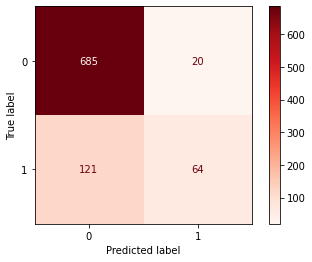

In [69]:
# Check Performance Model against Test-Set

y_pred_test = logreg_model.predict(X_test)
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Accrucary Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, cmap='Reds'))

Model Evaluation untuk Logistic Regression default di tuning akan dijelaskan pada section Classification Report Comparison

## Hyperparamater Tuning For Logistic Regression



Setelah dilakukan modeling dengan default parameter, saya akan mencoba tuning model Logistic Regression dengan menggunakan GridSearch. Beberapa Hyperparameter yang akan saya coba masukan adalah penalty,C,Solver, dan max_iter. Saya juga akan memasukkan beberapa kombinasi untuk mengetahui jenis apa saja yang terbaik dari Hyperparameter yang sudah dimasukkan

In [70]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [71]:
gridcv = GridSearchCV(logreg_model, param_grid = param_grid, cv = 3,  n_jobs=-1)

In [72]:
gridcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}])

In [73]:
gridcv.best_params_

{'C': 0.004832930238571752,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [74]:
gridcvbest = gridcv.best_estimator_

setelah dilakukan gridsearch, didapatkan kombinasi parameter yang terbaik yaitu:
- C = 0.004832930238571752
- max_iter= 100
- penalty= l2
- solver= 'liblinear

F1 Score - Test Set   :  0.4758364312267658 

Accrucary Score - Test Set   :  0.8415730337078652 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       705
           1       0.76      0.35      0.48       185

    accuracy                           0.84       890
   macro avg       0.81      0.66      0.69       890
weighted avg       0.83      0.84      0.82       890
 

Confusion Matrix      : 


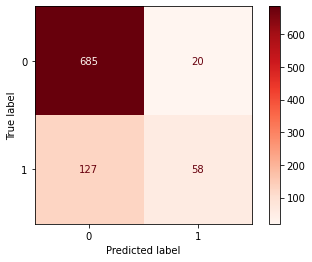

In [75]:
# Check Performance Model against Test-Set

y_pred_test_grid = gridcvbest.predict(X_test)
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Accrucary Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gridcvbest, X_test, y_test, cmap='Reds'))

Model Evaluation untuk Logistic Regression yang sudah di tuning akan dijelaskan pada section Classification Report Comparison

## Classification Report Comparison

Default Logistic Regression
F1 Score - Test Set   :  0.4758364312267658 

Accrucary Score - Test Set   :  0.8415730337078652 

Tuned Logistic Regression
F1 Score - Test Set   :  0.44106463878327007 

Accrucary Score - Test Set   :  0.8348314606741573 

Classification Report Default Logistic Regression : 

               precision    recall  f1-score   support

           0       0.85      0.97      0.91       705
           1       0.76      0.35      0.48       185

    accuracy                           0.84       890
   macro avg       0.81      0.66      0.69       890
weighted avg       0.83      0.84      0.82       890
 

Classification Report Tuned Logistic Regression: 

               precision    recall  f1-score   support

           0       0.84      0.97      0.90       705
           1       0.74      0.31      0.44       185

    accuracy                           0.83       890
   macro avg       0.79      0.64      0.67       890
weighted avg       0.82      0.83      

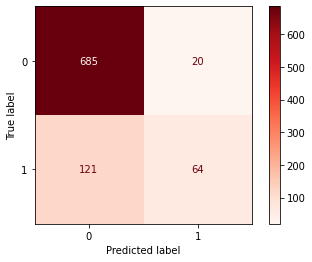

In [76]:
print('Default Logistic Regression')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Accrucary Score - Test Set   : ', accuracy_score(y_test, y_pred_test), '\n')
print('='*100)
print('Tuned Logistic Regression')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_grid), '\n')
print('Accrucary Score - Test Set   : ', accuracy_score(y_test, y_pred_test_grid), '\n')
print('='*100)

print('Classification Report Default Logistic Regression : \n\n', classification_report(y_test, y_pred_test), '\n')
print('Classification Report Tuned Logistic Regression: \n\n', classification_report(y_test, y_pred_test_grid), '\n')
print('='*100)
print('='*100)
print('Confusion Matrix of Default Logistic Regression      : \n','\n')
print(ConfusionMatrixDisplay.from_estimator(logreg_model, X_test, y_test, cmap='Reds'))





Confusion Matrix of Tuned Logistic Regression     : 
 



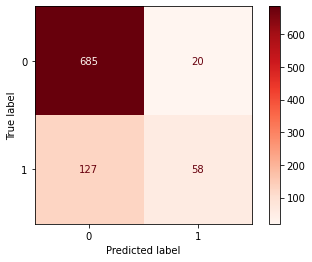

In [77]:
print('Confusion Matrix of Tuned Logistic Regression     : \n','\n')
print(ConfusionMatrixDisplay.from_estimator(gridcvbest, X_test, y_test, cmap='Reds'))


**Berikut adalah definisi dari kelas target:**
- 0 = nasabah yang melakukan pembayaran tepat waktu
- 1 = nasabah yang melakukan pembayaran telat atau belum lunas
 
**dalam kasus kali ini saya menentukan bahwa:**
- target +  = 1 yang artinya adalah nasabah yang melakukan pembayaran telat atau belum lunas
- target -  = 0 yang artinya adalah nasabah yang melakukan pembayaran tepat waktu
------------------------------------------------------------------------------
Urgensi dalam kasus kali ini adalah jika model memprediksi bahwa nasabah melakukan pembayaran tepat waktu tetapi pada kenyataannya nasabah melakukan pembayaran telat atau belum lunas, keadaan tersebut dianggap berbahaya karena salah prediksi dalam hal ini dapat menyebabkan kerugian pada Bank.

Maka  pada model kali ini saya ingin sebisa mungkin meminimalisir False Negative (kesalahan memprediksi kelas 1 menjadi kelas 0)

Dari penjabaran tersebut, maka saya memfokuskan untuk melihat nilai recall pada 
kelas 1. 

-------------------------------------------------------------------------------
**Perbandingan Nilai Recall**
1. Default Logistic Regression

Jika dilihat dari nilai recall pada kelas 1, dapat dikatakan bahwa model memiliki nilai recall yang kecil yang artinya model tidak dapat memprediksi nilai kelas yang difokuskan yaitu nilai kelas 1

2. Tuned Logistic Regression

Jika dilihat dari nilai recall pada kelas 1, dapat dikatakan bahwa model memiliki nilai recall yang kecil yang artinya model tidak dapat memprediksi nilai kelas yang difokuskan yaitu nilai kelas 1

**Perbandingan Confusion Matrix**
1. Default Logistic Regression

Dilihat dari Confusion Matrix, model dapat memprediksi nasabah yang melakukan pembayaran tepat waktu sebanyak 685 orang dan hanya salah memprediksi sebanyak 20 orang sebagai nasabah yang melakukan pembayaran telat atau belum lunas padahal tidak. Tetapi model hanya dapat memprediksi nasabah yang melakukan pembayaran telat atau belum lunas sebanyak 64 orang dari total 185 orang yang artinya sebanyak 121 salah diprediksi sebagai nasabah yang melakukan pembayaran tepat waktu padahal tidak
2. Tuned Logistic Regression

Dilihat dari Confusion Matrix, model dapat memprediksi nasabah yang melakukan pembayaran tepat waktu sebanyak 685 orang dan hanya salah memprediksi sebanyak 20 orang sebagai nasabah yang melakukan pembayaran telat atau belum lunas padahal tidak. Tetapi model hanya dapat memprediksi nasabah yang melakukan pembayaran telat atau belum lunas sebanyak 58 orang dari total 185 orang yang artinya sebanyak 127 salah diprediksi sebagai nasabah yang melakukan pembayaran tepat waktu padahal tidak

--------------------------------------------------------------------------------
Jika dilihat dari kedua perbandingan dari model yang tidak dituning dan tuning, baik dari nilai recall dan confusion matrix, model default logistic regression lebih baik secara keseluruhan, karena memiliki nilai recall yang lebih besar dan lebih baik dalam memprediksi nasabah yang melakukan pembayaran telat atau belum lunas walaupun dalam implementasi prediksinya tidak memiliki keakuratan yang baik 

## Model Inference

Menerapkan Model yang sudah Dibuat ke Data Baru Diluar dari Train-Set maupun Test-Set

Membuat data sampel sebanyak 15 baris

In [78]:
inf = df_final.sample(15, random_state=17)
inf.reset_index(drop=True, inplace=True)
inf

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,limit_balance,pay_amt_1
0,0.0,0.0,0.0,0.0,0,0,0,0.215190,0.641453
1,0.0,0.0,0.0,0.0,0,0,0,0.012658,0.117634
2,0.0,0.0,0.0,0.0,0,0,0,0.291139,0.714015
3,-1.0,-1.0,0.0,-1.0,-1,-1,1,0.291139,1.000000
4,0.0,0.0,0.0,0.0,0,0,0,0.177215,0.178504
5,2.0,0.0,0.0,0.0,0,0,1,0.101266,0.179307
6,0.0,0.0,0.0,0.0,0,0,0,0.202532,0.642613
7,0.0,0.0,0.0,0.0,0,0,0,0.050633,0.134681
8,-2.0,-2.0,-2.0,-2.0,-2,-2,0,0.278481,0.098088
9,-1.0,-1.0,-1.0,-1.0,-1,-1,0,0.088608,0.779972


In [79]:
inf_final = inf.drop('default_payment_next_month', axis=1)
inf_final

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,pay_amt_1
0,0.0,0.0,0.0,0.0,0,0,0.215190,0.641453
1,0.0,0.0,0.0,0.0,0,0,0.012658,0.117634
2,0.0,0.0,0.0,0.0,0,0,0.291139,0.714015
3,-1.0,-1.0,0.0,-1.0,-1,-1,0.291139,1.000000
4,0.0,0.0,0.0,0.0,0,0,0.177215,0.178504
5,2.0,0.0,0.0,0.0,0,0,0.101266,0.179307
6,0.0,0.0,0.0,0.0,0,0,0.202532,0.642613
7,0.0,0.0,0.0,0.0,0,0,0.050633,0.134681
8,-2.0,-2.0,-2.0,-2.0,-2,-2,0.278481,0.098088
9,-1.0,-1.0,-1.0,-1.0,-1,-1,0.088608,0.779972


Data Inference juga harus diperlakukan sama (dalam kasus kali ini adalah handling outlier dan scaling) seperti pada data train dan test

In [80]:
inf_final[num_col] = wins.transform(inf[num_col])


In [81]:
inf_final[num_col] = scaler.transform(inf[num_col])

Melihat hasil prediksi dari model terhadap Data Inference

In [82]:
y_pred_inf = gridcvbest.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted Class'])
y_pred_inf_df

,Predicted Class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### Predicted and Real Value Comparison in Inference

Untuk melihat lebih jelas, saya menggabungkan real value dari target dan Predicted value dari target

In [83]:
df_inf = pd.concat([y_pred_inf_df,inf[['default_payment_next_month']]],axis=1)
df_inf

,Predicted Class,default_payment_next_month
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


dapat dilihat bahwa model dapat memprediksi kelas 0 dengan baik tetapi ketika memprediksi kelas 1, model tidak dapat memprediksi dengan benar, situasi ini juga terjadi pada saat training dan testing, penyebabnya adalah data yang imbalance.

--------------------------------------------------------------------------------

## Conclusion

Dalam pembuatan model kali ini, saya melakukan pembuatan 8 model yaitu:
- Logistic Regression
- SVM
- Decision Tree
- KNN
- Naive Bayes
- Random Forest
- Gradient Boosting
- AdaBoost

1. Dari 8 permodelan tersebut, model terbaik yang didapatkan adalah logistic Regression untuk mengklasifikasikan default payment nasabah Bank Nasional Taiwan. Walaupun Logistic Regression adalah model yang paling tepat diantara yang lainnya, model ini tetap saja tidak cukup baik dalam memprediksi nasabah yang melakukan pembayaran telat atau belum lunas. Situasi tersebut bisa jadi disebabkan oleh data imbalance dimana dari total 2965 entry data, 2330 merupakan data yang default payment nya adalah 0 dan 635 data yang default payment nya adalah 1. 

2. Di kasus Hyperparameter Tuning dengan Grid Search, model Logistic Regression yang sudah dituning ternyata tidak menjadi lebih baik dari model Default Logistic Regression (ditinjau dari nilai recall dan f1 nya)

Kesimpulan secara keseluruhan adalah pada modeling kali ini, dilihat dari urgensi nya untuk memprediksi nasabah yang melakukan pembayaran telat atau belum lunas, maka model yang telah dibuat tidak cukup baik untuk dipakai memprediksi klasifikasi default payment nasabah di Bank Nasional Taiwan karena model hanya akurat dalam memprediksi nasabah yang melakukan pembayaran tepat waktu namun tidak akurat ketika memprediksi nasabah yang melakukan pembayaran telat atau belum lunas

## Conceptual Problems

**1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!**

Decision Tree merupakan model dengan konsep partisi sehingga setiap pemisahan kategori yang terjadi sangatlah penting dan Criterion merupakan parameter untuk memisahkan atribut. Untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree.

**Gini:**
Gini merupakan criterion default pada Decision Tree,  criteria ini mengukur ketidaksetaraan antara distribusi karakteristik target yang ada. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata.

**2. Apakah fungsi dari pruning pada Tree model?**

pruning adalaah metode untuk memangkas atau mengurangi ukuran pada suatu tree model dengan mengurangi cabang atau kedalaman tree model yang tidak dibutuhkan. Tujuan dari adanya pruning adalah ketika decision tree berukuran besar, maka dapat disederhanakan tergantung pada confidence level asumsi pribadi. Tujuan lainnya juga adalah untuk mengurangi tingkat kesalahan prediksi dan mencegah overfitting pada data

**3. Bagaimana cara memilih K yang optimal pada KNN?**

Ada 2 cara yang bisa dipakai:
- Membagi data menjadi train set dan tuning/validation set (Jangan gunakan Test set). gunakan validation set untuk menemukan k yang terbaik dan cocok untuk suatu kondisi yang sedang dijalani

- Elbow method adalah metode yang sering dipakai untuk menentukan jumlah K yang akan digunakan pada kNN. Metode elbow menggunakan nilai total wss (within sum square) sebagai penentu k optimalnya. WSS adalah ukuran untuk mengetahui keseragaman suatu cluster.

**4. Jelaskan apa yang kalian ketahui tentang Cross Validation!**

Cross-validation merupakan metode yang digunakan untuk mengevaluasi kinerja model yang sebelumnya data yang sudah ada sudah dibagi menjadi Train Set dan Test Set untuk dilakukan modeling. dalam Cross Validation, kita bisa melihat kinerja model (scoring,rata-rata dari hasil scoring, standar deviasi dan lain-lain). Salah satu keuntungan yang saya ketahui dari cross validation adalah sebuah metode yang bisa digunakan untuk membandingkan kinerja antar model dan menentukan model mana yang terbaik. 

**5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!**
Accuracy adalah jumlah prediksi benar pada target pada semua entry data. nilai Accuracy bisa membantu untuk mengetahui seberapa konsisten model dalam memprediksi, namun nilai accuracy akan lebih baik dijadikan acuan jika data target balance

Precision dilihat jika kita berfokus pada False Positive sedangkan Recall dilihat jika kita berfokus pada False Negative semakin besar nilai precision maupun recall (semakin mendekati 1) maka model sedikit dalam salah memprediksi karena precision atau recall yang besar artinya model berhasil meminimalisir False Negative ataupun False Positive

F1 Score adalah gabungan dari nilai precision dan recall, dan F1 score adalah rata-rata dari precision dan recall

Berikut adalah cara kalkulasi dari classification report:
- Accuracy = (TP + TN) /(TP + TN + FP + FN)
- Precision = (TP) / (TP + FP)
- Recall = (TP) / (TP + FN)
- F1 Score = (2 x Precision x Recall) / (Precision + Recall)